In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
df = pd.read_csv('all.csv')

In [3]:
df.head()

,Tiempo_Homicidio,Homicidio,Tiempo_Hurto,Hurtos,Tiempo_Rinas,Rinas,Date,SentimentPolarity
0,3/18/19,1.0,3/18/19,83,3/18/19,56,3/18/19,2.37
1,3/20/19,4.0,3/19/19,96,3/19/19,46,3/22/19,2.20
2,3/22/19,1.0,3/20/19,100,3/20/19,58,3/23/19,2.33
3,3/23/19,4.0,3/21/19,114,3/21/19,41,3/24/19,2.00
4,3/24/19,3.0,3/22/19,107,3/22/19,44,3/25/19,2.25


In [4]:
overall_pearson_r = df.corr().iloc[0,1]

In [16]:
print(f"Pandas computed Pearson r: {overall_pearson_r}")

Pandas computed Pearson r: 0.13390301110273986


In [58]:
r, p = stats.pearsonr(df.dropna()['Hurtos'], df.dropna()['SentimentPolarity'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
r, p = stats.pearsonr(df.dropna()['Rinas'], df.dropna()['SentimentPolarity'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
r, p = stats.pearsonr(df.dropna()['Homicidio'], df.dropna()['SentimentPolarity'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: -0.08600952788096491 and p-value: 0.11946565107222852
Scipy computed Pearson r: 0.05243765067698753 and p-value: 0.34304533074198207
Scipy computed Pearson r: -0.04114425438410524 and p-value: 0.45701940205394076


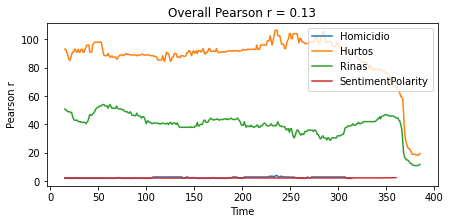

In [29]:
f,ax=plt.subplots(figsize=(7,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

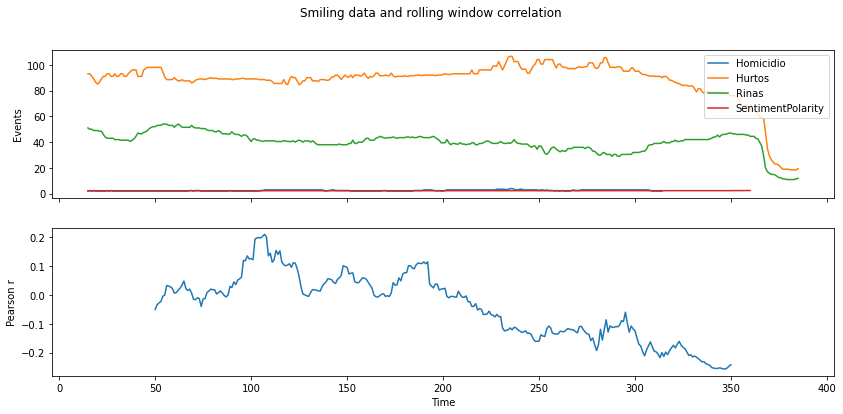

In [25]:
# Set window size to compute moving window synchrony.
r_window_size = 100
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['Homicidio'].rolling(window=r_window_size, center=True).corr(df_interpolated['SentimentPolarity'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Time',ylabel='Events')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Time',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")
plt.show()

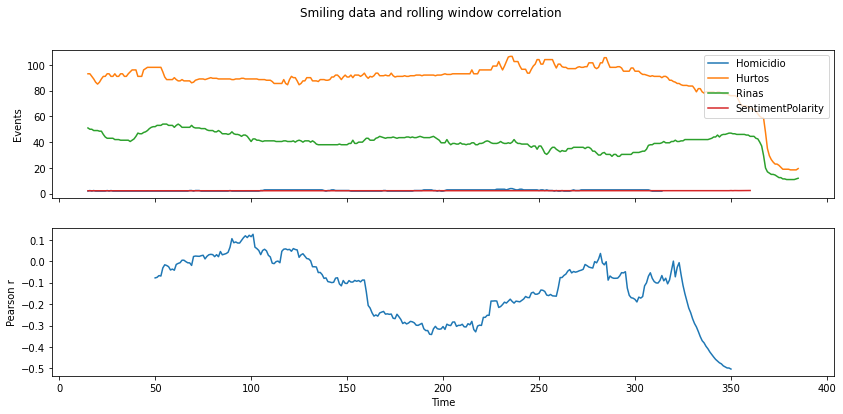

In [26]:
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['Hurtos'].rolling(window=r_window_size, center=True).corr(df_interpolated['SentimentPolarity'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Time',ylabel='Events')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Time',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")
plt.show()

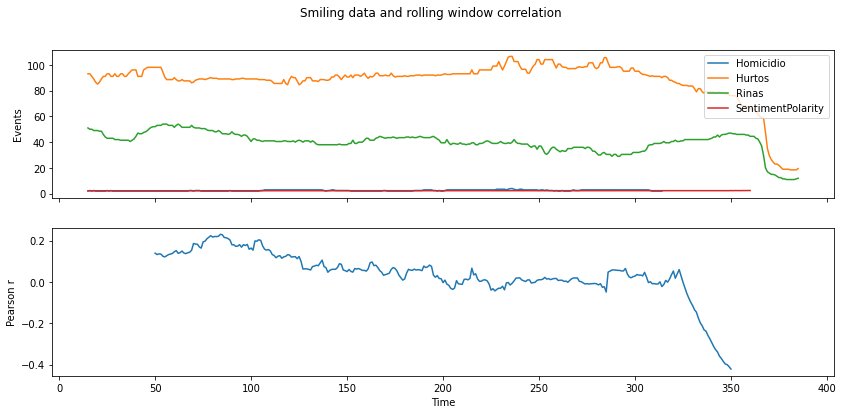

In [27]:
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['Rinas'].rolling(window=r_window_size, center=True).corr(df_interpolated['SentimentPolarity'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Time',ylabel='Events')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Time',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")
plt.show()

In [44]:
df1 = pd.read_csv('crimes.csv')
df1.head()

,Tiempo_Homicidio,Homicidio,Tiempo_Hurto,Hurtos,Tiempo_Rinas,Rinas
0,3/18/19,1,3/18/19,83,3/18/19,56
1,3/19/19,0,3/19/19,96,3/19/19,46
2,3/20/19,4,3/20/19,100,3/20/19,58
3,3/21/19,0,3/21/19,114,3/21/19,41
4,3/22/19,1,3/22/19,107,3/22/19,44


In [45]:
overall_pearson_r = df1.corr().iloc[0,1]

In [46]:
print(f"Pandas computed Pearson r: {overall_pearson_r}")

Pandas computed Pearson r: 0.05416370620787886


In [47]:
r, p = stats.pearsonr(df1.dropna()['Hurtos'], df1.dropna()['Rinas'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: 0.10534148359701997 and p-value: 0.035195723454763295


[Text(0, 0.5, 'Events'), Text(0.5, 0, 'Time')]

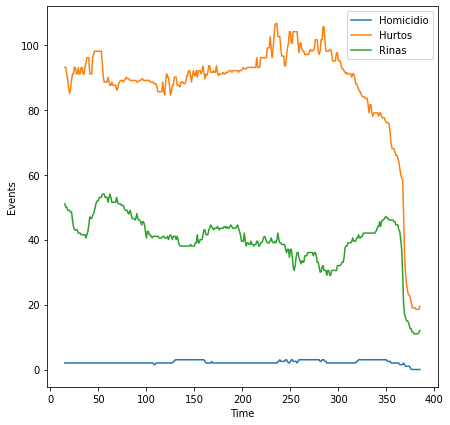

In [48]:
f,ax=plt.subplots(figsize=(7,7))
df1.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Events')

In [49]:
df2 = pd.read_csv('all_z.csv')
df2.head()

,Tiempo_Homicidio,Homicidio,Tiempo_Hurto,Hurtos,Tiempo_Rinas,Rinas,Date,SentimentPolarity
0,3/18/19,1,3/18/19,83,3/18/19,56,3/18/19,2.37
1,3/19/19,0,3/19/19,96,3/19/19,46,3/19/19,0.00
2,3/20/19,4,3/20/19,100,3/20/19,58,3/20/19,0.00
3,3/21/19,0,3/21/19,114,3/21/19,41,3/21/19,0.00
4,3/22/19,1,3/22/19,107,3/22/19,44,3/22/19,2.20


In [51]:
overall_pearson_r = df2.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

Pandas computed Pearson r: 0.05416370620787886


In [57]:
r, p = stats.pearsonr(df2.dropna()['Hurtos'], df2.dropna()['SentimentPolarity'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
r, p = stats.pearsonr(df2.dropna()['Rinas'], df2.dropna()['SentimentPolarity'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
r, p = stats.pearsonr(df2.dropna()['Homicidio'], df2.dropna()['SentimentPolarity'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: 0.16359118083496949 and p-value: 0.0010244194812708055
Scipy computed Pearson r: 0.03838366889697564 and p-value: 0.4439422626491915
Scipy computed Pearson r: 0.07044580665684905 and p-value: 0.15964856684341183


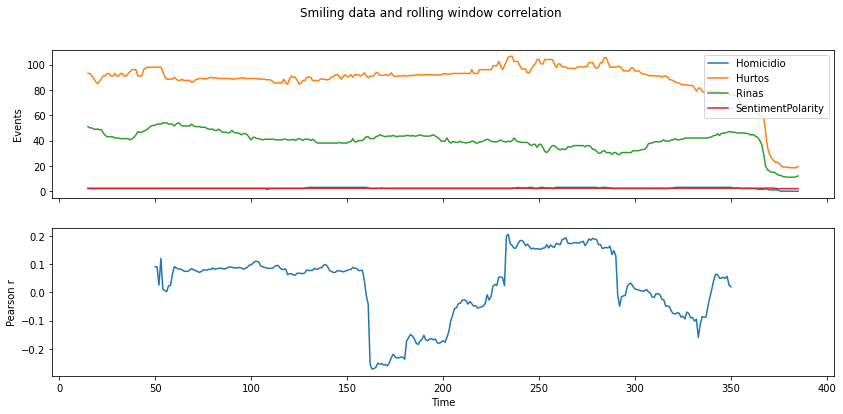

In [53]:
# Set window size to compute moving window synchrony.
r_window_size = 100
# Interpolate missing data.
df2_interpolated = df2.interpolate()
# Compute rolling window synchrony
rolling_r = df2_interpolated['Homicidio'].rolling(window=r_window_size, center=True).corr(df2_interpolated['SentimentPolarity'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df2.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Time',ylabel='Events')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Time',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")
plt.show()

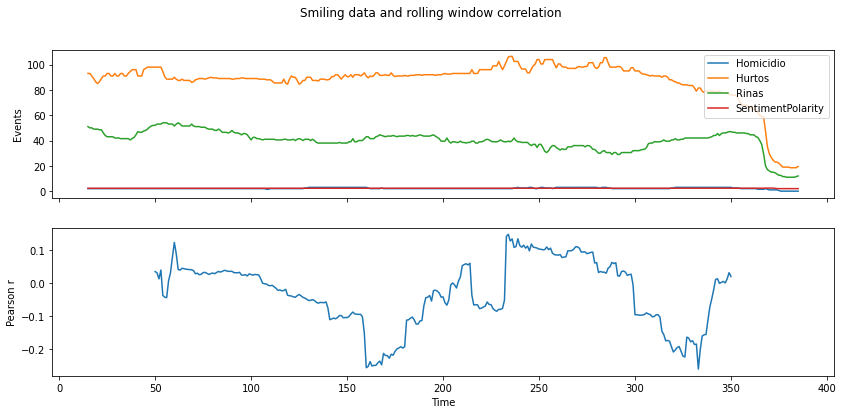

In [54]:
# Set window size to compute moving window synchrony.
r_window_size = 100
# Interpolate missing data.
df2_interpolated = df2.interpolate()
# Compute rolling window synchrony
rolling_r = df2_interpolated['Rinas'].rolling(window=r_window_size, center=True).corr(df2_interpolated['SentimentPolarity'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df2.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Time',ylabel='Events')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Time',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")
plt.show()

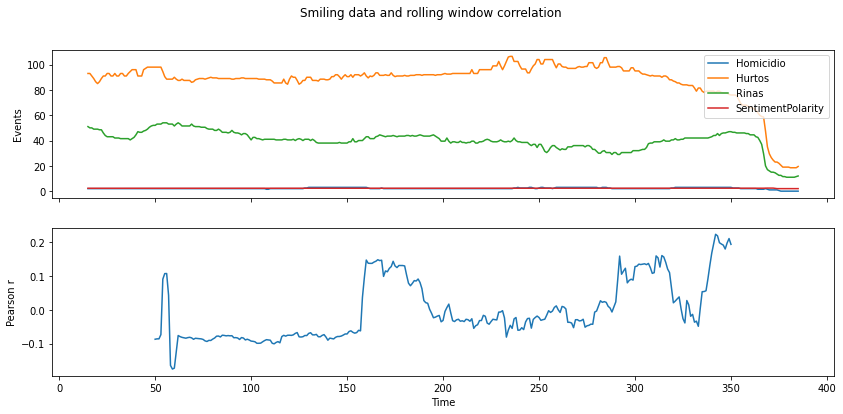

In [55]:
# Set window size to compute moving window synchrony.
r_window_size = 100
# Interpolate missing data.
df2_interpolated = df2.interpolate()
# Compute rolling window synchrony
rolling_r = df2_interpolated['Hurtos'].rolling(window=r_window_size, center=True).corr(df2_interpolated['SentimentPolarity'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df2.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Time',ylabel='Events')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Time',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")
plt.show()